In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from kneed import KneeLocator

,Rating,Raters
0,4.26,1331732
1,4.25,979436
2,4.01,1119957
3,3.98,630669
4,4.04,516341


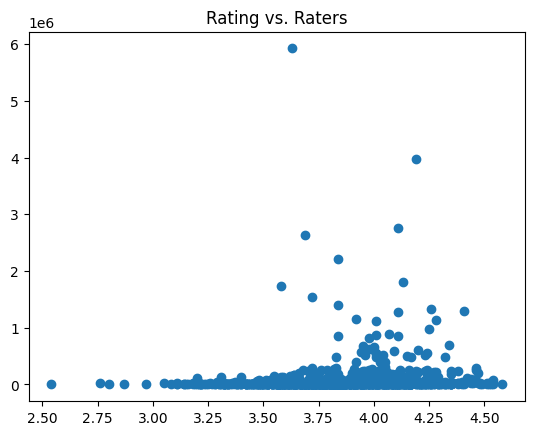

In [2]:
#importing the dataset
data = pd.read_csv("HorrorBooks.csv")
data = data[["Rating", "Raters"]]
points = np.array(data)
x_points = points[:,0]
y_points = points[:,1]
plt.title("Rating vs. Raters")
plt.scatter(x=x_points, y=y_points)
data.head()

In [3]:
#training K-means clustering
km = KMeans(n_clusters=3, init = "random", n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(points)

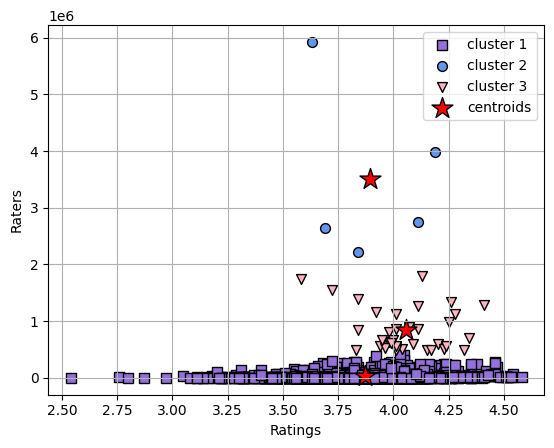

In [4]:
#plotting the 3 clusters
plt.scatter(points[y_km == 0, 0], points[y_km == 0, 1], s=50, c='mediumpurple', marker='s', edgecolor='black', label='cluster 1')

plt.scatter(points[y_km == 1, 0], points[y_km == 1, 1], s=50, c='cornflowerblue', marker='o', edgecolor='black', label='cluster 2')

plt.scatter(points[y_km == 2, 0], points[y_km == 2, 1], s=50, c='lightpink', marker='v', edgecolor='black', label='cluster 3')

#plotting the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')

#legend for the data
plt.legend(scatterpoints=1)
plt.xlabel("Ratings")
plt.ylabel("Raters")
plt.grid()
plt.show()

In [5]:
#calculate the distortions
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(points)
    distortions.append(km.inertia_)

print(distortions)

[99422706760336.61, 38049048536787.234, 18111923636647.37, 12702011859104.945, 6952142307904.845, 6366754065257.281, 6172327278994.316, 6107438663880.137, 6088141969171.438, 3736425994977.8325]


In [6]:
#finding the optimal value of k through the elbow method
kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

3

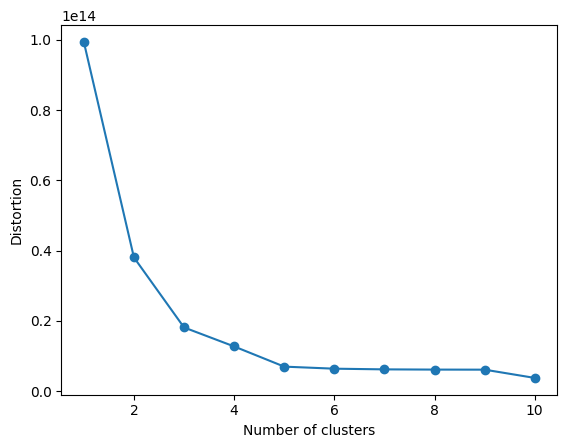

In [7]:
#plotting the distortions
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Through the elbow method, for my group's dataset, the optimal value k (number of clusters) is 3.